# Project 4: Major Leagues
## Import Libraries
Import useful libraries and ML models

In [1]:
#libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn import preprocessing
import seaborn as sea
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#models
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier

#ignore warnings
import warnings
warnings.filterwarnings("ignore") 

## Loading the datasets and drop some unused features or duplicate features
Source: https://github.com/fivethirtyeight/data/tree/master/mlb-elo

In [2]:
df_all = pd.read_csv("Data\\mlb_elo_latest.csv")
df_all = df_all.drop(["date","season","neutral","playoff","pitcher1","pitcher2","pitcher1_rgs","pitcher2_rgs","pitcher1_adj","pitcher2_adj","elo1_post","elo2_post","rating1_post","rating2_post"],axis = 1)

## Cleaning Dataset
Delete NULL rows from dataset since they may cause all kinds of problem when we include them in ML models.

In [3]:
df_all.dropna(inplace=True)
df_all.head()

team1 team2     elo1_pre     elo2_pre  elo_prob1  elo_prob2  rating1_pre  \
20   SDP   STL  1522.312734  1520.100045   0.550128   0.449872  1530.728125   
21   CHC   FLA  1517.011886  1478.403936   0.617874   0.382126  1520.999030   
22   LAD   MIL  1596.678175  1502.693145   0.712092   0.287908  1604.605528   
23   SDP   STL  1519.722828  1522.689951   0.540271   0.459729  1528.808158   
24   OAK   CHW  1545.674260  1507.785767   0.616569   0.383431  1531.215901   

    rating2_pre  rating_prob1  rating_prob2  score1  score2  
20  1513.055229      0.461857      0.538143     4.0     0.0  
21  1472.069596      0.673112      0.326888     0.0     2.0  
22  1508.163888      0.673916      0.326084     3.0     0.0  
23  1514.975196      0.544395      0.455605    11.0     9.0  
24  1515.390101      0.558056      0.441944     6.0     4.0

## Visualizing
### Take a overall visualizing for team1 and team2 about their ELO and rating pre, prob, post and score.

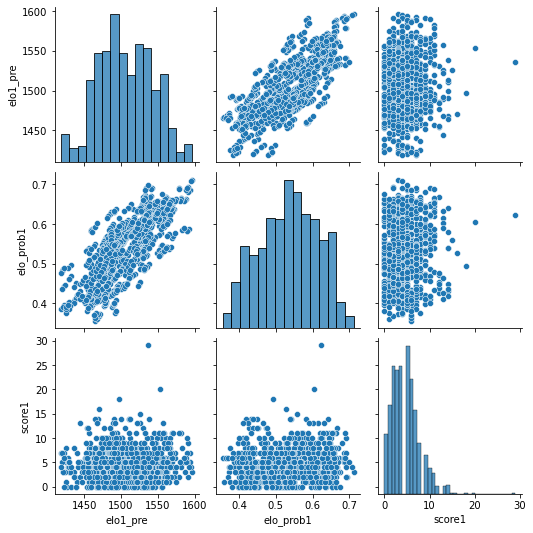

In [4]:
sea.pairplot(df_all[['elo1_pre', 'elo_prob1','score1']])

By observing the plot, we can notice that the similiarity between home team elo1_pre/elo_prob1 are high. there is no significant change in the scores before and oafter the game, and they are basically distributed diagonally. By looking at the elo1_pre and elo_prob1 versus score1, we can see the score of a team in each round is not directly determined by the score of elo prediction.Most teams score below 10, even if elo prediction are pretty high which exceeds 1550, its final score is difficult to reach 20. 

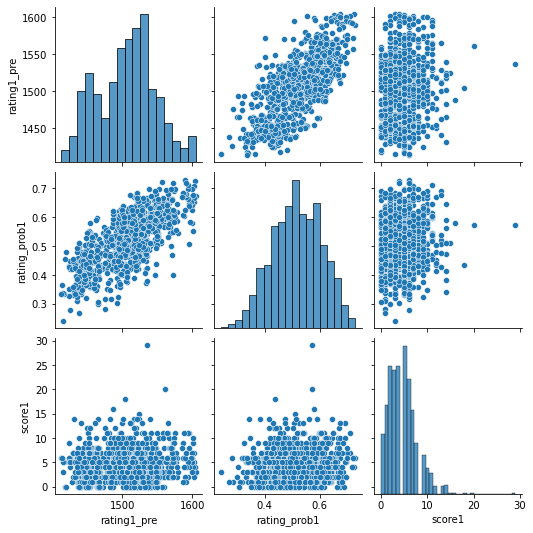

In [5]:
sea.pairplot(df_all[['rating1_pre', 'rating_prob1','score1']])

The result is close to elo1's observation. 
It is hard to determine which prediction is better and this may give us some ideas to establish additional value to make the predict more accurate.

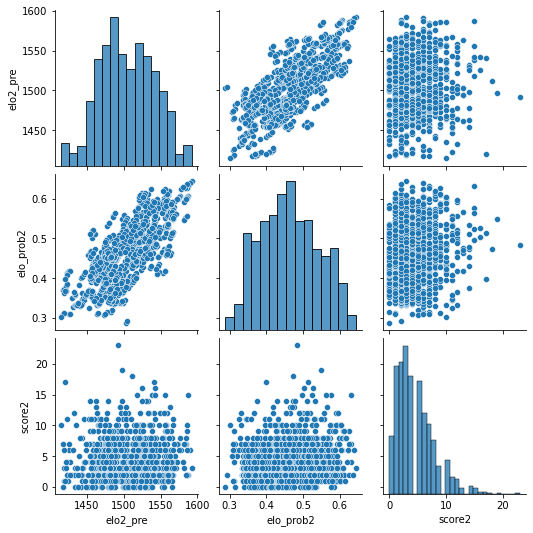

In [6]:
sea.pairplot(df_all[['elo2_pre', 'elo_prob2','score2']])

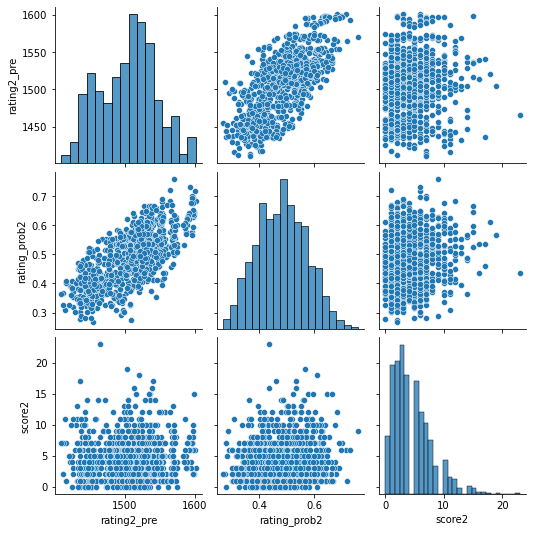

In [7]:
sea.pairplot(df_all[['rating2_pre', 'rating_prob2','score2']])

### Let's take a quit look on how the same team behave when they are at home and they are in away。

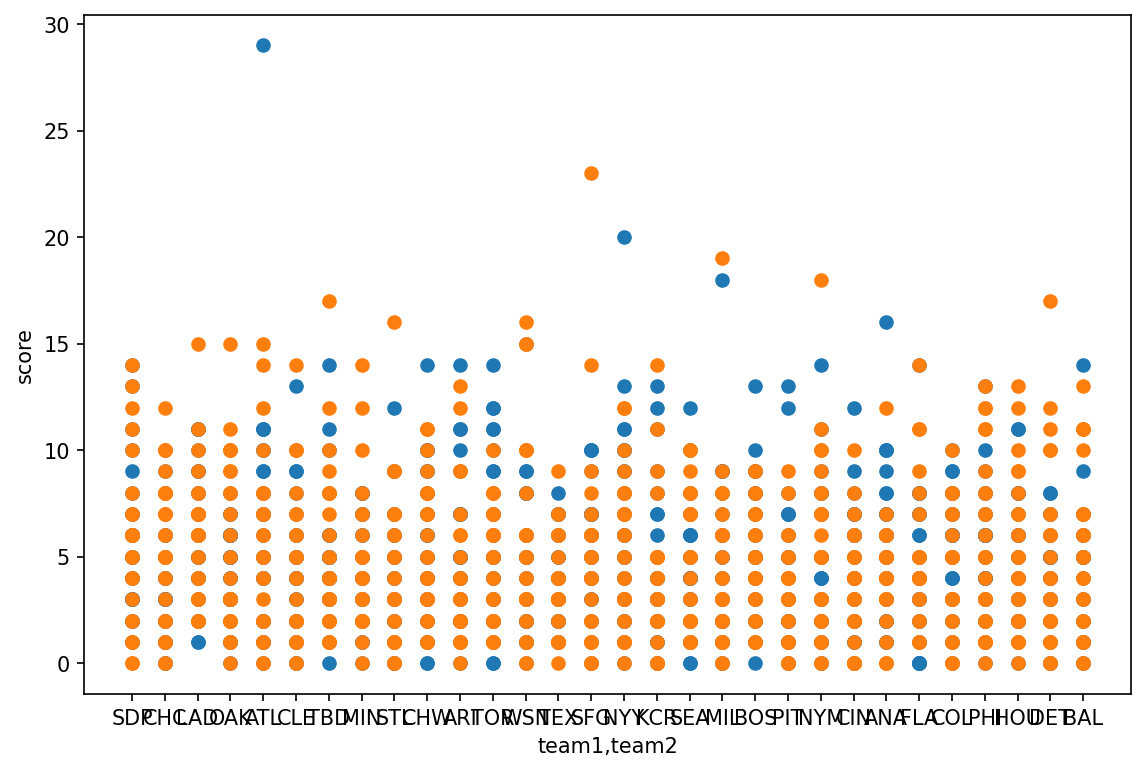

In [8]:
fig = pyplot.figure(figsize=(9,6),dpi=150)
pyplot.plot(df_all['team1'],df_all['score1'],"o",df_all['team2'],df_all['score2'],"o")
pyplot.xlabel('team1,team2')
pyplot.ylabel('score')
pyplot.show()

Like the result in previous visulization, most teams score is not high at all. Every team has 0-5 score in 2020 and very less team have score higher than 15.

## Data Preparing
Using LabelEncoder() to convert team name to integer feature, so the ML model can easily call.

In [9]:
df_all['team1'] = preprocessing.LabelEncoder().fit_transform(df_all['team1'])
df_all['team2'] = preprocessing.LabelEncoder().fit_transform(df_all['team2'])
df_all.head()

team1  team2     elo1_pre     elo2_pre  elo_prob1  elo_prob2  rating1_pre  \
20     22     25  1522.312734  1520.100045   0.550128   0.449872  1530.728125   
21      5     11  1517.011886  1478.403936   0.617874   0.382126  1520.999030   
22     14     15  1596.678175  1502.693145   0.712092   0.287908  1604.605528   
23     22     25  1519.722828  1522.689951   0.540271   0.459729  1528.808158   
24     19      6  1545.674260  1507.785767   0.616569   0.383431  1531.215901   

    rating2_pre  rating_prob1  rating_prob2  score1  score2  
20  1513.055229      0.461857      0.538143     4.0     0.0  
21  1472.069596      0.673112      0.326888     0.0     2.0  
22  1508.163888      0.673916      0.326084     3.0     0.0  
23  1514.975196      0.544395      0.455605    11.0     9.0  
24  1515.390101      0.558056      0.441944     6.0     4.0

In [10]:
df_all['pre1']=df_all['elo1_pre']**2 + df_all['rating1_pre']**2
df_all['pre2']=df_all['elo2_pre']**2 + df_all['rating2_pre']**2
df_all['prob1']=df_all['elo_prob1']**2 + df_all['rating_prob1']**2
df_all['prob2']=df_all['elo_prob2']**2 + df_all['rating_prob2']**2
df_all['pre1']=np.sqrt(df_all['pre1'])
df_all['pre2']=np.sqrt(df_all['pre2'])
df_all['prob1']=np.sqrt(df_all['prob1'])
df_all['prob2']=np.sqrt(df_all['prob2'])
df_all

team1  team2     elo1_pre     elo2_pre  elo_prob1  elo_prob2  \
20      22     25  1522.312734  1520.100045   0.550128   0.449872   
21       5     11  1517.011886  1478.403936   0.617874   0.382126   
22      14     15  1596.678175  1502.693145   0.712092   0.287908   
23      22     25  1519.722828  1522.689951   0.540271   0.459729   
24      19      6  1545.674260  1507.785767   0.616569   0.383431   
..     ...    ...          ...          ...        ...        ...   
931     26     28  1537.750707  1487.408999   0.605383   0.394617   
932      7     10  1490.427814  1420.458239   0.632029   0.367971   
933     17      2  1521.484830  1528.909097   0.523836   0.476164   
934     14     24  1561.949414  1487.819917   0.637581   0.362419   
935     29     18  1561.015923  1558.092336   0.538669   0.461331   

     rating1_pre  rating2_pre  rating_prob1  rating_prob2  score1  score2  \
20   1530.728125  1513.055229      0.461857      0.538143     4.0     0.0   
21   1520.999030  1472.069596      0.673112      0.326888     0.0     2.0   
22   1604.605528  1508.163888      0.673916      0.326084     3.0     0.0   
23   1528.808158  1514.975196      0.544395      0.455605    11.0     9.0   
24   1531.215901  1515.390101      0.558056      0.441944     6.0     4.0   
..           ...          ...           ...           ...     ...     ...   
931  1539.417329  1478.540428      0.602440      0.397560     4.0     6.0   
932  1521.707154  1436.198577      0.665662      0.334338     7.0     1.0   
933  1529.122226  1528.008772      0.563735      0.436265     1.0     0.0   
934  1584.386566  1453.743200      0.670766      0.329234     8.0     1.0   
935  1548.108452  1571.038134      0.438047      0.561953     1.0     4.0   

            pre1         pre2     prob1     prob2  
20   2158.834096  2144.770448  0.718299  0.701415  
21   2148.199970  2086.304650  0.913700  0.502868  
22   2263.656355  2129.000940  0.980428  0.434996  
23   2155.646506  2147.960551  0.766980  0.647245  
24   2175.713918  2137.714919  0.831615  0.585093  
..           ...          ...       ...       ...  
931  2175.886704  2097.252328  0.854062  0.560158  
932  2130.015899  2019.992070  0.917914  0.497176  
933  2157.111696  2161.567448  0.769546  0.645801  
934  2224.852077  2080.138793  0.925438  0.489636  
935  2198.501874  2212.648310  0.694297  0.727061  

[916 rows x 16 columns]

Restore data to a new repository and store it in local document

In [11]:
df_final = df_all.loc[:,['team1','team2','pre1','pre2','prob1','prob2','score1','score2']]
df_final.to_csv('Data\\mlb_combined.csv')
df_final.head()

team1  team2         pre1         pre2     prob1     prob2  score1  score2
20     22     25  2158.834096  2144.770448  0.718299  0.701415     4.0     0.0
21      5     11  2148.199970  2086.304650  0.913700  0.502868     0.0     2.0
22     14     15  2263.656355  2129.000940  0.980428  0.434996     3.0     0.0
23     22     25  2155.646506  2147.960551  0.766980  0.647245    11.0     9.0
24     19      6  2175.713918  2137.714919  0.831615  0.585093     6.0     4.0

## Build Regression Models
Using other columns as features to build regression models to determine the scores for each team.
### Linear Regression
Build model to predict team1

In [12]:
X1 = df_final.loc[:, (df_final.columns != 'score1')]
Y1 = df_final['score1'].values
X1_train, X1_validation, Y1_train, Y1_validation = train_test_split(X1,Y1,test_size=0.30, random_state=1, shuffle = True)
print(X1_train)
print(X1_validation)
print(Y1_train)
print(Y1_validation)

model = LinearRegression()
model.fit(X1_train, Y1_train)
predictions = model.predict(X1_validation)
prediction = []
def convertR(floatlist, target):
    for i in floatlist:
        if i%1>0.5:
            target.append(round(i))
        elif i%1<0.4:
            target.append(round(i)-1)
        else:
            target.append(round(i))

convertR(predictions,prediction)


     team1  team2         pre1         pre2     prob1     prob2  score2
265     15      5  2130.982505  2152.095431  0.690624  0.725389     4.0
277     16      8  2177.718418  2165.775862  0.752940  0.661509     1.0
181     20     28  2124.861218  2102.713934  0.767048  0.647322     7.0
674      7     21  2121.705804  2060.714587  0.821539  0.592874     9.0
573     24      0  2074.180869  2092.467556  0.747494  0.667902     5.0
..     ...    ...          ...          ...       ...       ...     ...
787     22     14  2113.075705  2233.153187  0.586184  0.828222     5.0
92       2     11  2188.231967  2072.388368  0.908113  0.506262     4.0
928      8     13  2160.919809  2053.838019  0.890134  0.524127     0.0
255     11     20  2069.076585  2132.670461  0.689266  0.725689     1.0
57      16      7  2183.957949  2135.300904  0.804071  0.611348     3.0

[641 rows x 7 columns]
     team1  team2         pre1         pre2     prob1     prob2  score2
294     29      2  2160.768983  2178.891

In [13]:
print('Accuracy: '+ str(accuracy_score(Y1_validation, prediction)))

Accuracy: 0.12363636363636364


In [14]:
X2 = df_final.loc[:, (df_final.columns != 'score2')]
Y2 = df_final['score2'].values
X2_train, X2_validation, Y2_train, Y2_validation = train_test_split(X2,Y2,test_size=0.30, random_state=1, shuffle = True)
print(X2_train)
print(X2_validation)
print(Y2_train)
print(Y2_validation)

model = LinearRegression()
model.fit(X2_train, Y2_train)
predictions = model.predict(X2_validation)
prediction = []
def convertR(floatlist, target):
    for i in floatlist:
        if i%1>0.5:
            target.append(round(i))
        elif i%1<0.4:
            target.append(round(i)-1)
        else:
            target.append(round(i))

convertR(predictions,prediction)

     team1  team2         pre1         pre2     prob1     prob2  score1
265     15      5  2130.982505  2152.095431  0.690624  0.725389     2.0
277     16      8  2177.718418  2165.775862  0.752940  0.661509     3.0
181     20     28  2124.861218  2102.713934  0.767048  0.647322     8.0
674      7     21  2121.705804  2060.714587  0.821539  0.592874     6.0
573     24      0  2074.180869  2092.467556  0.747494  0.667902    10.0
..     ...    ...          ...          ...       ...       ...     ...
787     22     14  2113.075705  2233.153187  0.586184  0.828222     2.0
92       2     11  2188.231967  2072.388368  0.908113  0.506262     2.0
928      8     13  2160.919809  2053.838019  0.890134  0.524127     2.0
255     11     20  2069.076585  2132.670461  0.689266  0.725689     2.0
57      16      7  2183.957949  2135.300904  0.804071  0.611348     7.0

[641 rows x 7 columns]
     team1  team2         pre1         pre2     prob1     prob2  score1
294     29      2  2160.768983  2178.891

In [15]:
print('Accuracy: '+ str(accuracy_score(Y2_validation, prediction)))
print(confusion_matrix(Y2_validation, prediction))

Accuracy: 0.13818181818181818
[[ 0  0  1  4  8  9  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  7 13 14  3  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  4  7  9  5  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 13 13  8  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  3 14 12  6  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  7  9  5  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  7  5  3  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  5 11  6  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  4  5  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  2  1  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]]


Result is not good. When decial place get involved with prediction, the result may change drastically.

### Neural Network

In [16]:
model_NN = MLPClassifier(alpha=1, max_iter=1000)
model_NN.fit(X1_train, Y1_train)
predictions_NN = model_NN.predict(X1_validation)
print('Accuracy: '+ str(accuracy_score(Y1_validation, predictions_NN)))

Accuracy: 0.10909090909090909


In [17]:
model_NN = MLPClassifier(alpha=1, max_iter=1000)
model_NN.fit(X2_train, Y2_train)
predictions_NN = model_NN.predict(X2_validation)
print('Accuracy: '+ str(accuracy_score(Y2_validation, predictions_NN)))

Accuracy: 0.09090909090909091


## Conclusion
In this project, I use elo and rating predictions and probabilities as my features to count the score. The results are not very good.It is extremely hard to predict the specific score for each team just base on these features. The score may influenced by small and sensitive elements. No matter how much detail we gain, it is still nearly impossible to predict the specific socre each team gain when they face the differnt opponent and different situation. In my opinion, I think our direction was wrong at the beginning, the win/lost rate may be a good approach. It is reasonalbe to use these features to predict the result of games. 